Iniziamo abilitando subito l'estensione `autoreload`

In [1]:
%load_ext autoreload
%autoreload 2

# Lettura di File CSV

## Gestione di Dati Sperimentali

**Supponiamo di aver effettuato misure sperimentali**

...Per caratterizzare le prestazioni di un ciclista

<center>
<img src="assets/bike.jpg" width=50%/>
</center>

* Abbiamo installato un sensore per misurare la forza esercitata sui pedali
* ...Ed abbiamo chiesto al ciclista di aumentare la velocità fino al massimo

## Gestione di Dati Sperimentali

**Dati sperimentali di questo tipo**

...Vengono tipicamente strutturati in tabelle

velocità | forza
:-------:|:-----:
0    |   0
0.2    |   0.3
...    | ...


* La tabella è quindi salvata in un file con un formato opportuno
* E.g. file excel, .mat, ODS, CSV, HDF5...

**Il primo passo per una analisi sperimentale è accedere ai dati nel file**

* I nostri dati sono nel file [data/bicycle.csv](http://127.0.0.1:8888/edit/data/bicycle.csv)
* ...Che è in formato CSV

## Formato CSV

**CSV sta per Comma Separated Values (valori separati da virgole)**

Vediamone un piccolo esempio

```
"speed","force"
0.0,-0.013567540115007604
0.1414141414141414,-0.5415313487144505
0.2828282828282828,-0.38254467422691973
0.4242424242424242,-0.16841035025027298
```

* Il file è in formato testuale (come i file `.py` o `.txt`)
* La prima riga del file di solito contiene l'intestazione della tabella
* La righe successive corrispondono alle righe della tabella
* I valori su una riga sono divisi da un separatore (di solito la virgola)
* I valori testuali sono abitualmente racchiusi tra doppi apici

## Lettura di File CSV

**Il formato CSV è molto utilizzato per lo scambio di dati**

* Può essere esaminato e modificato con un editor di testo
* Può essere letto e scritto da molte applicazioni (MS Excel, OpenOffice, etc.)
* Può essere letto e scritto utilizzando librerie Python

**La terza opzione (usare Python) è molto interessante**

...Perché Python fornisce pacchetti di analisi dati _molto_ potenti:

* [pandas](https://pandas.pydata.org/) manipolazione di dati ed analisi statistiche
* [scipy](https://scipy.org/) per calcolo scientifico avanzato
* [scikit-learn](https://scikit-learn.org/stable/) per apprendimento automatico (Machine Learning)
* [tensorflow](https://www.tensorflow.org/) per Deep Learnin (reti neurali)
* ...

## Accesso a File in Python

**Per leggere un file CSV dobbiamo innanzitutto accedere al file stesso**

Questo richiede di:

* Comunicare al file system che desideriamo "aprire" il file
* Effettura la lettura
* Comunicare al file system che desideriamo "chiudere" il file

È importante che tutte le fasi vengano eseguite

* ...Ma in pratica è facile dimenticarsi di effettura la chiusura

**Python gestisce questa sequenza usando l'_istruzione `with`_**

La sintassi è:

```
with <espressione> as <variabile>:
    <blocco>
```

## Accesso a File in Python

**`with` è un notazione compatta per una sequenza di normali istruzioni**

In particolare, la sintassi:

```
with <espressione> as <variabile>:
    <blocco>
```

È (quasi) equivalente a:

```python
<variabile> = <espressione>
<variabile>.__enter__()
<blocco>
<variabile>.__exit__()
```

* `<espressione>` deve restituire un oggetto
* ...Per quale devono essere definiti i metodi `__enter__` ed `__exit__`
* Per i file `__exit__` effettua la chiusura

## Un Esempio Pratico

**Proviamo ad aprire il file `bicycle.csv` nella cartella `data`**

* Per prima cosa, dobbiamo ottenerne il _percorso relativo_
* Questo dipende (purtroppo dal sistema operativo)
  - Su Windows, il percorso è "data\bicycle.csv"
  - Su OS X/Linux è "data/bicycle.csv"

**Possiamo ottenere una versione generale usando la funzione `os.path.join`**

In [3]:
import os

fname = os.path.join('data', 'bicycle.csv')
print(f'Percorso relativo del file: {fname}')

Percorso relativo del file: data/bicycle.csv


* La funzione concatena le stringhe passate come argomento
* ...Usando il separatore corretto per il SO operativo utilizzato

## Un Esempio Pratico

**Possiamo ora usare `with` per gestire l'apertura e chiusura**

In [4]:
import os

fname = os.path.join('data', 'bicycle.csv')
with open(fname) as fp:
    pass

* La funzione `open` apre il file in lettura, in modalità testo
* ...E restituisce un _file descriptor_, che viene assegnato in `fp`
* Il blocco `with` si occupa della chiusura del file

**Sono possibili [modalità di apertura diverse](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files) (e.g. in scrittura, modalità binaria)**

* Vanno usate con cautela (aprendo un file in scrittura ne si cancella il contenuto)
* ...In questo corso ci limiteremo ad aprire file in lettura

## Un Esempio Pratico

**Possiamo leggere il contenuto del file (e.g.) con `readlines`**

In [5]:
import os

fname = os.path.join('data', 'bicycle.csv')
with open(fname) as fp:
    lines = fp.readlines()

print(lines[:3])

['"speed","force"\n', '0.0,1.2531560444730068\n', '0.1414141414141414,0.22194751712574834\n']


* `readlines` è un metodo del file descriptor
* Legge le righe del file una ad una e le inserisce in una lista
* ...Ma non interpreta in alcun modo i dati contenuti
* Ogni linea è semplicemente una stringa

## Un Esempio Pratico

**Possiamo leggere _ed interpretare_ il contenuto del file usando il [modulo `csv`](https://docs.python.org/3/library/csv.html)**

In [6]:
import os, csv

fname = os.path.join('data', 'bicycle.csv')
with open(fname) as fp:
    reader = csv.reader(fp, quoting=csv.QUOTE_NONNUMERIC)
    for i, row in enumerate(reader):
        print(row)
        if i >= 2:
            break

['speed', 'force']
[0.0, 1.2531560444730068]
[0.1414141414141414, 0.22194751712574834]


Per prima cosa, una volta aperto file, istanziamo un oggetto `reader`

* `reader` è una classe in grado di leggere ed interpretare file CSV
* Il costrutture richiede come unico parametro obbligatorio il file descriptor

## Un Esempio Pratico

**Possiamo leggere _ed interpretare_ il contenuto del file usando il [modulo `csv`](https://docs.python.org/3/library/csv.html)**

In [7]:
import os, csv

fname = os.path.join('data', 'bicycle.csv')
with open(fname) as fp:
    reader = csv.reader(fp, quoting=csv.QUOTE_NONNUMERIC)
    for i, row in enumerate(reader):
        print(row)
        if i >= 2:
            break

['speed', 'force']
[0.0, 1.2531560444730068]
[0.1414141414141414, 0.22194751712574834]


Si può modificare il comportamento di `reader` mediante parametri opzionali

* Per esempio si può indicare di usare un separatore diverso dalla virgola
* Nel nostro caso, `quoting=csv.QUOTE_NONNUMERIC` indica che...
* ...Ogni dato non racchiuso da "..." va considerato un float 

## Un Esempio Pratico

**Possiamo infine convertire il risultato in un array `numpy`**

In [8]:
import os, csv
import numpy as np

fname = os.path.join('data', 'bicycle.csv')
header, data = None, []
with open(fname) as fp:
    reader = csv.reader(fp, quoting=csv.QUOTE_NONNUMERIC)
    for i, row in enumerate(reader):
        if i == 0:
            header = row # La prima riga del CSV contiene l'intestazione
        else:
            data.append(row) # ...Le altre righe contengono dati

data = np.array(data)
print(data[:3, :]) # prime tre righe dell'array

[[0.         1.25315604]
 [0.14141414 0.22194752]
 [0.28282828 0.24585546]]


L'intestazione del file/tabella può fare comodo (la mettiamo in una variabile)

## Modulo di Esempio

**Il codice mostrato è disponibile nella funzione `example.analyze.read_csv`**

In [10]:
import os
from base import analyze

fname = os.path.join('data', 'bicycle.csv')
data, header = analyze.read_csv(fname)

print(header) # Intestazione (nomi delle colonne)
print(data[:3, :]) # prime tre righe dell'array

['speed', 'force']
[[0.         1.25315604]
 [0.14141414 0.22194752]
 [0.28282828 0.24585546]]


* La funzione riceve come parametro il percorso del file
* ...E restituisce i dati e l'intestazione

## Plotting Our Data

**Esaminiamo i nostri dati con un _grafico di disperisione_**

* Un grafico di dispersione è come un grafico cartesiamo, ma _senza le linee_
* In `matplotlib` possiamo ottenerne uno con la funzione `scatter`

Ne possiamo ottenere uno con `example.analyze.scatter`:

```python
def scatter(x, y, xlabel=None, ylabel=None, figsize=None):
    plt.figure(figsize=figsize)
    plt.scatter(x, y)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(':')
    plt.show()
```

## Plotting Our Data

**Procediamo ora a visualizzare i nostri dati**

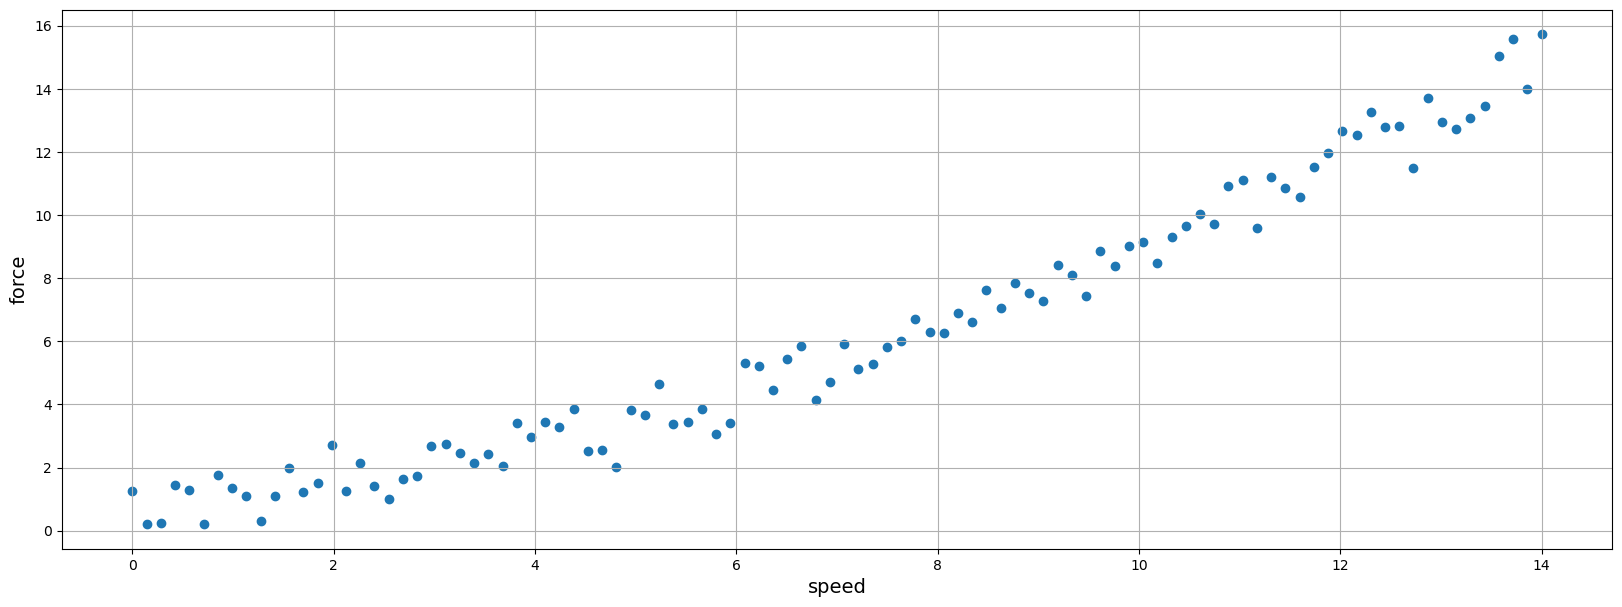

In [12]:
analyze.scatter(x=data[:, 0], y=data[:, 1],
                     xlabel='speed', ylabel='force', figsize=(20, 7))

# Metodo Lineare dei Minimi Quadrati

## Analisi della Curva

**Quando un ciclista pedala, deve opporsi a tre forze**

* La forza di trascinamento dovuta all'aria
  - ...Che ha una dipendenza quadratica dalla velocità, i.e. $\alpha_2 v^2$
* L'attrito dovuto allo sfregamento dei padali
  - ...Che cresce linearmente con la velocità, i.e. $\alpha_1 v$
* L'attrito volvente delle ruote sul terreno
  - ...Che è approssimativamente costante, i.e. $\alpha_0$

**Quindi la dipendenza della forza rispetto alla velocità...**

...È descritta da una equazione nella forma:

$$
F(x) = \alpha_2 x^2 + \alpha_1 x + \alpha_0
$$

**Il nostro obiettivo è _determinare i coefficienti_**

## Rumore di Misura

**Possiamo vederlo come un problema di progettazione di curve**

...Ma se lo facciamo ci rendiamo conto di _due problemi_

* In primo luogo, i nostri dati sono soggetti a _rumore di misura_

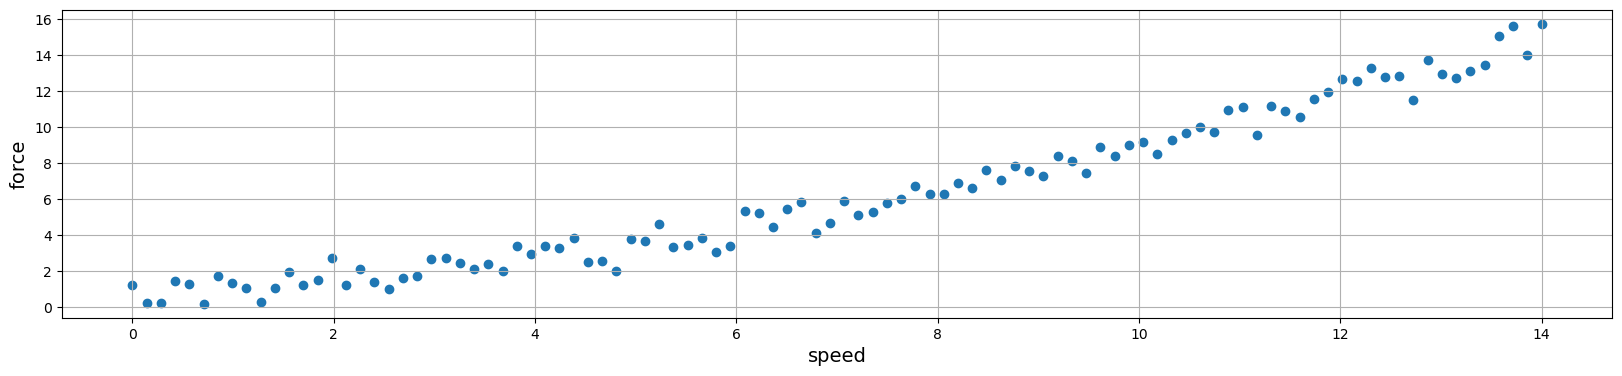

In [13]:
analyze.scatter(x=data[:, 0], y=data[:, 1], xlabel='speed', ylabel='force', figsize=(20, 4))

* I valori della forza misurata non sono esatti
* ...Quindi non ha senso interpolarli in modo esatto!

## Sovra-determinatezza

**Possiamo vederlo come un problema di progettazione di curve**

...Ma se lo facciamo ci rendiamo conto di _due problemi_

* In secondo luogo, il sistema risultata ha più condizioni che parametri

$$
\underbrace{\left(\begin{array}{ccc}
x_0^2  & x_0    & 1 \\
x_1^2  & x_1    & 1 \\
\vdots & \vdots & \vdots
\end{array}\right)}_{X}
\left(\begin{array}{c}
\alpha_2 \\
\alpha_1 \\
\alpha_0
\end{array}\right)
= 
\left(\begin{array}{c}
y_0 \\
y_1 \\
\vdots
\end{array}\right)
$$

* Il sistema di equazioni linaere si dice _sovradeterminato_
* ...E non ammettere in generale soluzioni

**Come possiamo risolvere queste difficoltà?**

## Soluzione Approssimata

**Il "trucco" è accontentarsi di una _soluzione approssimata_**

Per esempio, invece di risolvere un sistema in modo esatto, i.e.:
$$
X \alpha = y
$$

...Possiamo minimizzare una _metrica di errore_:
$$
\arg\min_{\alpha} \|X \alpha - y \|_2^2
$$

* $X\alpha$ rappresta il valore della nostra curva per ogni $x$
* $y$ sono i valori da approssimare
* $X\alpha - y$ rappresenta l'errore di approssimazione (si chiama _residuo_)
* $\| \ldots \|_2^2$ è semplicementa la somma dei quadrati (norma L2)

## Metodo dei Minimi Quadrati

**Questa formulazione si chiama _problema ai minimi quadrati_**

$$
\arg\min_{\alpha} \|X \alpha - y \|_2^2
$$

* La metrica da minimizzare si chiama anche _SSE_ (Sum of Squared Errors)
* ...Perché è letteralmente la somma dei quadrati degli errori

**Dal punto di vista geometrico è un paraboloide**

...I.e. una parabola in $m$ dimensioni (tante quanti i coefficienti)

* Come tutti i paraboloidi è una [funzione convessa](https://en.wikipedia.org/wiki/Convex_function)
* Quindi ha _un solo punto di minimo_
* ...In corrispondenza del punto in cui il gradiente (derivata) si annulla

**Determineremo ora sotto quali condizioni questo succeda**

## Metodo dei Minimi Quadrati

**Iniziamo osservando che:**

$$
\begin{align}
\|X\alpha - y\|_2^2 &= (X \alpha - y)^T(X \alpha -y) \\
& = (X \alpha)^T (X \alpha) - (X \alpha)^T y - y^T (X \alpha) + y^T y \\
\end{align}
$$

* Nell'ultima formula tutti i termini sono scalari (perché $\|X\alpha - y\|_2^2$)
* ...E quindi possono essere trasposti a piacimento
* Inoltre, per il prodotto matriciale vale che: $(AB)^T = B^T A^T$

**Di qui otteniamo:**

$$
\begin{align}
\|X\alpha - y\|_2^2 &= (X \alpha)^T (X \alpha) - 2 y^T (X \alpha) + y^T y \\
&= \alpha^T (X^T X) \alpha - 2 (y^T X) \alpha + y^T y
\end{align}
$$

## Metodo dei Minimi Quadrati

**Ora osserviamo che:**

* Il gradiente di un prodotto scalare $\nabla a x$ è $a^T$
* Il gradiente di una forma quadratica $\nabla x^T A x$ è $(A^T + A) x$

Le due formule possono essere ottenute (con un po' di sforzo) dalle definizioni

**Possiamo usare i due risultati per ottenere:**

$$
\begin{align}
\nabla \|X\alpha - y\|_2^2 &= \nabla \alpha^T (X^T X) \alpha - 2 \nabla (y^T X) \alpha + \underbrace{\nabla y^T y}_{=0} \\
&= (X^T X + X^T X) \alpha - 2 (X^T y) \\
&= 2 (X^T X) \alpha - 2 (X^T y)
\end{align}
$$

## Metodo dei Minimi Quadrati

**Ora poniamo come condizione che il gradiente si annulli**

$$
2 (X^T X) \alpha - 2 (X^T y) = 0
$$

Da cui otteniamo _un nuovo sistema lineare_:

$$
X^T X \alpha = X^T y
$$

Il vettore $\alpha$ che lo risolve _corrisponde alla migliore approssimazione_

**Il sistema somiglia molto a quello da cui siamo partiti**

Con due differenze:

* La matrice dei coefficienti è data da $X^TX$ anziché da $X$
* Il vettore dei termini noti è dato da $X^T y$ anziché da $y$

## Minimi Quadrati in `numpy`

**In teoria potremmo risolvere il sistema nel solito modo**

* Impostiamo $X$ ed $y$ come nel caso della progettazione di curve
* Calcoliamo $X^T X$ e $X y$
* Usiamo `numpy.linalg.solve` per risolvere il sistema modificato

**In pratica, `numpy` può effetuare questo procedimento per noi**

Dato un problema ai minimi quadrati nella forma:
$$
\arg\min \|X \alpha -y \|_2^2
$$

...Possiamo risolverlo direttamente con `numpy.linalg.lstsq`

* I parametri sono la matrice dei coefficienti
* ...Ed il vettore dei termini noti

## Un Esempio Pratico

**Nel nostro casso, la matrice dei coefficienti ed il vettore dei termini noti sono:**

$$
X = \left(\begin{array}{ccc}
x_0^2  & x_0    & 1 \\
x_1^2  & x_1    & 1 \\
\vdots & \vdots & \vdots
\end{array}\right)
\quad\quad
y = \left(\begin{array}{c}
y_0 \\
y_1 \\
\vdots
\end{array}\right)
$$

* Sono del tutto simili a quelle usate per la progettazione di curve
* ...Ma contengono molti più termini

**Per questa ragione non è pratico costruirle scrivendo gli elementi uno per uno**

* Però ci sono dei "pattern" molto visibili
* La prima colonna contiene gli $x^2$, la seconda gli $x$ e così via

## Un Esempio Pratico

**Possiamo quindi:**

Recuperare separatamente velocità $x$ e forza $y$ dai dati:

In [14]:
x, y = data[:, 0], data[:, 1]

Costruire i vettori corrispondenti alle colonne:

In [15]:
c0 = x**2
c1 = x
c2 = np.ones(len(x))

* Da notare che al momento si tratta di vettori riga!

In [16]:
c0.shape

(100,)

## Un Esempio Pratico

**Quindi procediamo come segue:**

Trasformiamo i vettori riga in vettori colonna

In [17]:
c0 = c0.reshape(-1, 1)
c1 = c1.reshape(-1, 1)
c2 = c2.reshape(-1, 1)

* `reshape` cambia la forma di un array
* Un `-1` come argomenti indica che quel valore deve essere derivato
* ...A partire dal numero totale di elementi

Controlliamo che i vettori abbiano la forma corretta:

In [18]:
c0.shape

(100, 1)

## Un Esempio Pratico

**Adesso possiamo concatenare i vettori colonna**

In [20]:
X = np.hstack([c0, c1, c2])
print(X[:5, :]) # Prime 5 righe della matrice

[[0.         0.         1.        ]
 [0.01999796 0.14141414 1.        ]
 [0.07999184 0.28282828 1.        ]
 [0.17998163 0.42424242 1.        ]
 [0.31996735 0.56565657 1.        ]]


* `hstack` accetta come parametro una collezione di array
* ...E li accosta sull'asse "orizzontale"

Nel nostro caso accosta le tre colonne

## Un Esempio Pratico

**Infine possiamo ottenere la soluzione**

In [21]:
alpha, sse, _, _ = np.linalg.lstsq(X, y, rcond=None)
print(alpha, sse)

[0.05278913 0.28679521 0.76922934] [35.18965831]


* `rcond=None` è opzionale (sopprime un messagio di allerta temporaneo)
* La funzione restituisce tre valori
* Il primo è la soluzione, il secondo è l'SSE (come array)
* Gli altri non ci interessano
  - Per questo li mettiamo in un variabile con un nome breve (i.e. "`_`")

**La soluzione corrisponde ai coefficienti nelle tre forze di attrito**

## Modulo di Esempio

**Il codice è disponibile nella funzione `example.analyze.fit`**

```python
def fit(x_list, y):
    # Converto i vettori in colonne
    x_cols = [x.reshape(-1, 1) for x in x_list]
    # Ottengo la matrice dei coefficienti
    X = np.hstack(x_cols)
    # Risolvo il problema ai minimi quadrati
    sol, sse, _, _ = np.linalg.lstsq(X, y)
    # Restituisco il risultato
    return sol, see[0]
```

* La funzione è pensata per accettare in ingresso una lista di vettori riga
* ...Così da facilitarne l'utilizzo

## Graficare i Risultati

**In alcuni casi è possibile graficare la relazione ingresso/uscita**

Per comodità è stata fornita la funzione `example.analyze.plot`

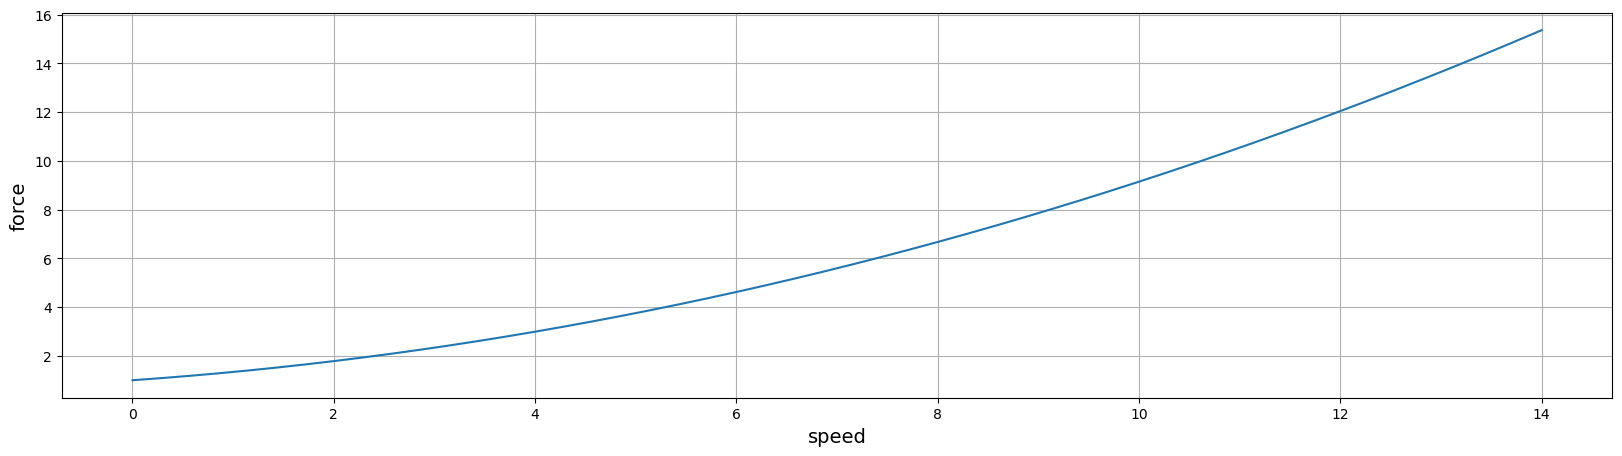

SSE: 35.190


In [22]:
(alpha2, alpha1, alpha0), sse = analyze.fit([x**2, x, x**0], y)
xs = np.linspace(x.min(), x.max()) # valori x _per il disegno (non i dati!)_
ys = alpha2 * xs**2 + alpha1 * xs + 1 # valori y per il disegno
analyze.plot(xs, ys, xlabel='speed', ylabel='force', figsize=(20, 5))
print(f'SSE: {sse:.3f}')

## Graficare i Risultati

**In tutti i casi si possono confrontare le stime con i valori misurati**

Allo scopo si può usare un grafico di dispersione

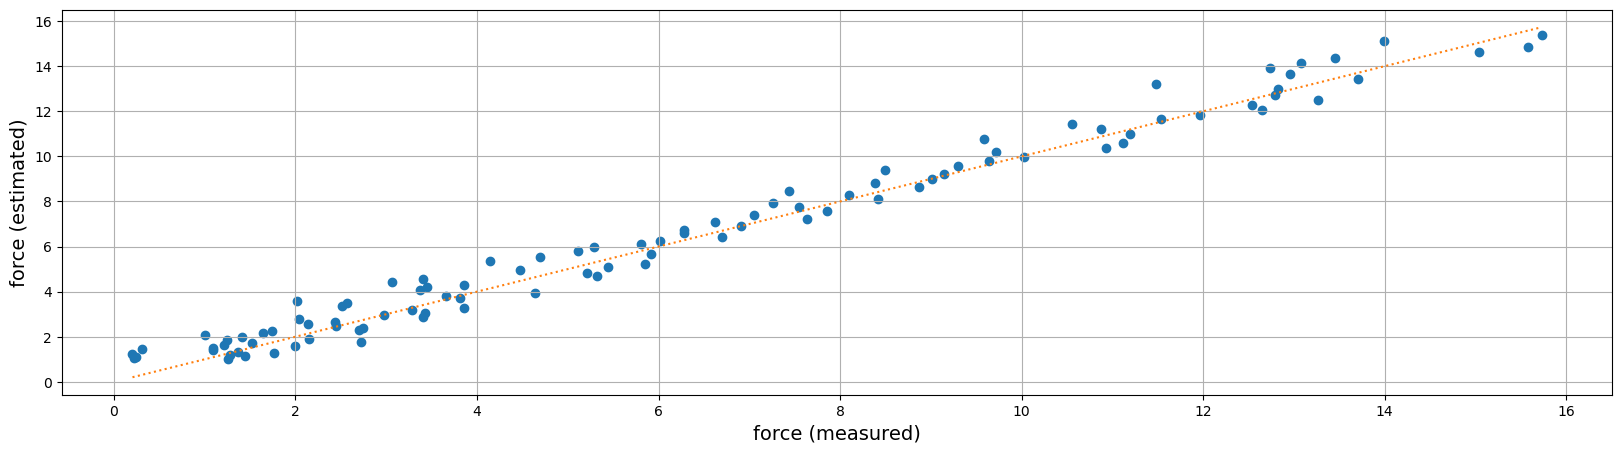

In [23]:
yp = alpha2 * x**2 + alpha1 * x + 1 # stime del modello, per ogni esempio
analyze.scatter(y, yp, xlabel='force (measured)', ylabel='force (estimated)', figsize=(20, 5), add_bisector=True)

* In questi casi è utile disegnare la bisettrice del primo quadrante
* ...Perché più i punti vi sono vicino, più alta la qualità delle previsioni
* La funzione `example.analyze.scatter` contiene una modifica per poterlo fare